# Incremental Searches Method

The **incremental searches method** is used to locate intervals where a continuous function $ f(x) $ changes sign, indicating the presence of a root. The method starts from an initial guess $ x_0 $ and evaluates the function at that point. Then, it moves incrementally by a small value $ \Delta x $ and evaluates the function at each new point.

The key theoretical foundation is based on the **Intermediate Value Theorem**, which states that if a continuous function changes sign over an interval $[x_0, x_1]$, meaning $ f(x_0) f(x_1) < 0 $, then there must be at least one root within that interval. The method continues searching in this way, increasing the interval until either a root is found or the function changes sign, indicating the presence of a root between two points.

If the function at any point is zero, that point is considered a root. If after a specified number of iterations no root is found, the method terminates, indicating failure.

In [64]:
# Incremental searches method

def incremental_searches(x0, f, delta, Niter = 100):
    fx0 = f(x0)
    if fx0 == 0:
        print(str(x0) + 'is a root for f(x)')
        return x0
    else:
        x1 = x0 + delta
        cont = 1
        fx1 = f(x1)

        while fx0 * fx1 > 0  and cont < Niter:
            x0 = x1
            fx0 = fx1
            x1 = x0 + delta
            fx1 = f(x1)
            cont += 1

        if fx1 == 0:
            print(str(x1) + 'is a root for f(x)')
            return x0
        elif fx0 * fx1 < 0:
            print('There exists a root between ' + str(x0) + '  and ' + str(x1))
            return None
        else:
            print(f'The method failed in {Niter} iterations (no roots found)')
            return None

In [63]:
# Graph the function in the interval [a, b]
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

def graph_function_and_interval(a, b, f, delta = 0.01, left_width = 2, right_width = 2):

    x = np.arange(a-left_width, b+right_width, delta)
    image_of_x = f(x)

    plt.plot(x, image_of_x, label = '$f(x)$')

    # Vertical line for a
    plt.axvline(x=a, color='r', linestyle='--')
    plt.text(a - (b-a)*0.02, max(image_of_x) * 0.9, f'$a$', color='r', ha='center')

    # Vertical line for b
    plt.axvline(x=b, color='r', linestyle='--')
    plt.text(b + (b-a)*0.02, max(image_of_x) * 0.9, f'$b$', color='r', ha='center')

    plt.grid(True)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()

    plt.show()

There exists a root between 0.764  and 0.765


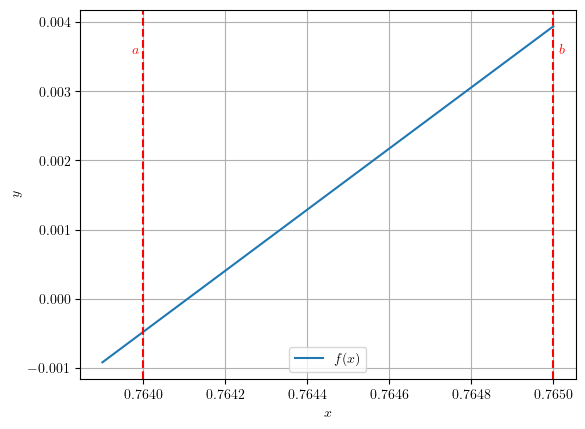

In [62]:
# Test and usage
import timeit

def fun(x):
    return np.exp(2-6*x) * np.cos(x**2 - 3) + 4*x - 3

# Add a %timeit before to time the algorithm
incremental_searches(x0 = 0.75, f = fun, delta = 1e-3)
graph_function_and_interval(0.764, 0.765, fun, delta = 1e-4, left_width=1e-4, right_width= 1e-4)